## Title: Mice Protein Level Expression
### Student Name: Bijo B Thomas
### Student Id: s3758150

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from  sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import os

## Reading and preprocessing the data

In [2]:
df = pd.read_csv("Data_Cortex_Nuclear.csv")

In [3]:
df.shape

(1080, 82)

In [4]:
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


Since mouse Id doesnt contribute to any analysis, we remove the column

In [5]:
#Since mouse Id soesnt contribute to any analysis, we remove the column
df.drop(columns = 'MouseID',inplace = True)


checking for any white spaces and irregularities in the cell values

In [6]:
for columns in df.columns:
    if(df[columns].dtypes == object):
        print(df[columns].value_counts()," \n")

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64  

Memantine    570
Saline       510
Name: Treatment, dtype: int64  

S/C    555
C/S    525
Name: Behavior, dtype: int64  

c-CS-m    150
c-SC-m    150
c-SC-s    135
c-CS-s    135
t-SC-s    135
t-SC-m    135
t-CS-m    135
t-CS-s    105
Name: class, dtype: int64  



In [7]:
df.isnull().sum()

DYRK1A_N             3
ITSN1_N              3
BDNF_N               3
NR1_N                3
NR2A_N               3
pAKT_N               3
pBRAF_N              3
pCAMKII_N            3
pCREB_N              3
pELK_N               3
pERK_N               3
pJNK_N               3
PKCA_N               3
pMEK_N               3
pNR1_N               3
pNR2A_N              3
pNR2B_N              3
pPKCAB_N             3
pRSK_N               3
AKT_N                3
BRAF_N               3
CAMKII_N             3
CREB_N               3
ELK_N               18
ERK_N                3
GSK3B_N              3
JNK_N                3
MEK_N                7
TRKA_N               3
RSK_N                3
                  ... 
RRP1_N               0
BAX_N                0
ARC_N                0
ERBB4_N              0
nNOS_N               0
Tau_N                0
GFAP_N               0
GluR3_N              0
GluR4_N              0
IL1B_N               0
P3525_N              0
pCASP9_N             0
PSD95_N    

checking for empty cells in each row

In [8]:
#checking for empty cells in each row
df['Empty Cells']=df.isnull().sum(axis=1)

In [9]:
list = []
for ind,rows in df.iterrows():
    if (rows['Empty Cells'] > 40):
        list.append(ind)
print(list)


[987, 988, 989]


#### Since these rows have majority of empty cells we drop these rows

In [10]:
df.drop(df.index[list],inplace=True)

Now we impute the null values with the median of the column

In [11]:
for cols in df.select_dtypes(['int','float']):
    df[cols].fillna(df[cols].median(),inplace=True)

### Checking for outliers and removal of outliers

In [12]:
count = 0
for col in df.select_dtypes(['int','float']):
    q1 = np.percentile(df[col],25,interpolation = 'midpoint')
    q2 = np.percentile(df[col],75,interpolation = 'midpoint')
    iqr = q3 =q1
    if(df[col].min() <(q1 - 1.5*iqr) or (df[col].max() >(q3 + 1.5*iqr))):
        count = count +1
print(count," features has outliers")    

23  features has outliers


In [13]:
for col in df.select_dtypes(['int','float']):
    q1 = np.percentile(df[col],25,interpolation = 'midpoint')
    q2 = np.percentile(df[col],75,interpolation = 'midpoint')
    iqr = q3 =q1
    if(df[col].min() < (q1 - 1.5*iqr)):
        df[col] = np.where(df[col] < (q1 - 1.5*iqr),(q1 - 1.5*iqr),df[col])
    elif (df[col].max() > (q3 + 1.5*iqr)):
        df[col] = np.where(df[col] > (q3 + 1.5*iqr),(q3 + 1.5*iqr),df[col])

## Exploring the data

We check for correlation between the features

In [14]:
df.drop(columns=['Empty Cells'],inplace =True)
df.corr()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
DYRK1A_N,1.000000,0.926275,0.389031,0.299626,0.336227,-0.203607,-0.132712,-0.208707,0.050257,0.677330,...,-0.233295,-0.313693,-0.229677,-0.385758,-0.324606,-0.096660,-0.363787,-0.426834,-0.412101,0.561693
ITSN1_N,0.926275,1.000000,0.495427,0.457687,0.455101,-0.155195,-0.102318,-0.137693,0.211497,0.717790,...,-0.224595,-0.392302,-0.310137,-0.264132,-0.396433,0.030729,-0.322935,-0.475570,-0.432018,0.584472
BDNF_N,0.389031,0.495427,1.000000,0.805784,0.749927,0.319493,0.390530,0.241885,0.603857,0.514643,...,-0.080776,-0.174017,-0.132020,0.127703,-0.249404,0.450433,-0.119196,-0.221713,-0.221859,0.262578
NR1_N,0.299626,0.457687,0.805784,1.000000,0.873810,0.212995,0.244224,0.297296,0.597443,0.467155,...,-0.141423,-0.341432,-0.290608,0.264181,-0.364932,0.473366,-0.225549,-0.279915,-0.305798,0.205463
NR2A_N,0.336227,0.455101,0.749927,0.873810,1.000000,0.111719,0.110929,0.275279,0.392849,0.462741,...,-0.259197,-0.398054,-0.260422,0.263526,-0.415719,0.401290,-0.302659,-0.310935,-0.386468,0.187760
pAKT_N,-0.203607,-0.155195,0.319493,0.212995,0.111719,1.000000,0.828465,0.461656,0.598918,0.082270,...,0.144670,0.270664,0.229064,0.301811,0.047835,0.249901,0.326479,0.242565,0.286856,-0.239543
pBRAF_N,-0.132712,-0.102318,0.390530,0.244224,0.110929,0.828465,1.000000,0.375142,0.586992,0.160238,...,0.134769,0.271600,0.262730,0.258775,0.145095,0.284492,0.284534,0.287975,0.300328,-0.213691
pCAMKII_N,-0.208707,-0.137693,0.241885,0.297296,0.275279,0.461656,0.375142,1.000000,0.404335,-0.083141,...,0.045975,0.068730,0.009709,0.392956,-0.052649,0.248475,0.200028,0.075171,0.063827,-0.376370
pCREB_N,0.050257,0.211497,0.603857,0.597443,0.392849,0.598918,0.586992,0.404335,1.000000,0.260379,...,0.065719,-0.055512,-0.093464,0.302119,-0.171975,0.413060,0.217359,-0.109569,0.027473,0.039517
pELK_N,0.677330,0.717790,0.514643,0.467155,0.462741,0.082270,0.160238,-0.083141,0.260379,1.000000,...,-0.236353,-0.231700,-0.080293,-0.153887,-0.220301,0.040956,-0.249955,-0.241959,-0.261017,0.253765


### Exploring the data through visualisations

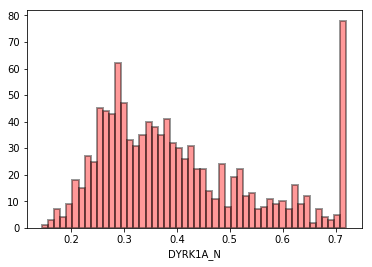

In [15]:
sns.distplot(df['DYRK1A_N'], kde=False, color='red', bins=50,hist_kws = dict(lw=2,edgecolor='black'))

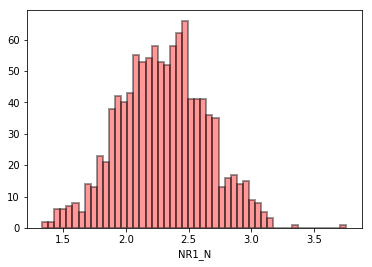

In [16]:
sns.distplot(df['NR1_N'], kde=False, color='red', bins=50,hist_kws = dict(lw=2,edgecolor='black'))

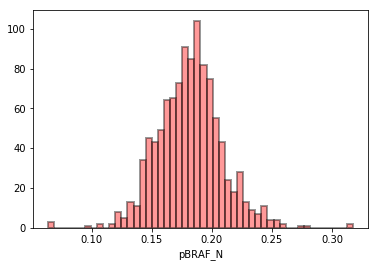

In [17]:
sns.distplot(df['pBRAF_N'], kde=False, color='red', bins=50,hist_kws = dict(lw=2,edgecolor='black'))

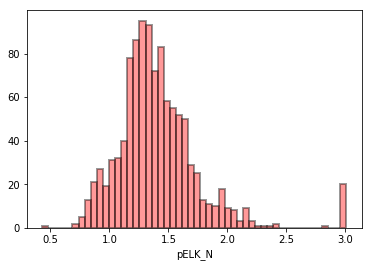

In [18]:
sns.distplot(df['pELK_N'], kde=False, color='red', bins=50,hist_kws = dict(lw=2,edgecolor='black'))

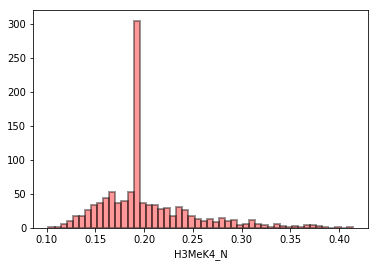

In [19]:
sns.distplot(df['H3MeK4_N'], kde=False, color='red', bins=50,hist_kws = dict(lw=2,edgecolor='black'))

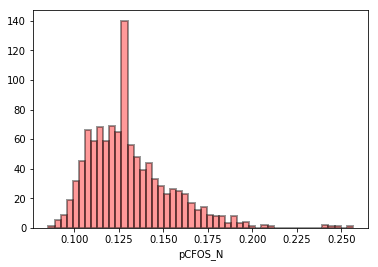

In [20]:
sns.distplot(df['pCFOS_N'], kde=False, color='red', bins=50,hist_kws = dict(lw=2,edgecolor='black'))

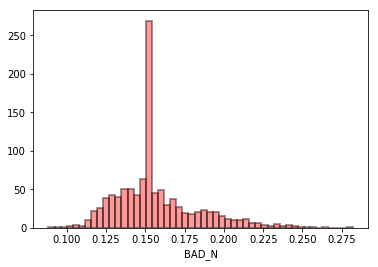

In [21]:
sns.distplot(df['BAD_N'], kde=False, color='red', bins=50,hist_kws = dict(lw=2,edgecolor='black'))

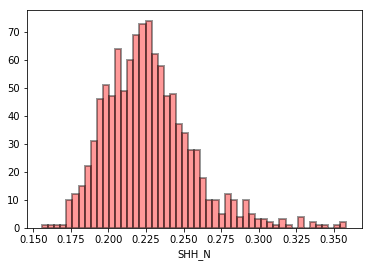

In [22]:
sns.distplot(df['SHH_N'], kde=False, color='red', bins=50,hist_kws = dict(lw=2,edgecolor='black'))

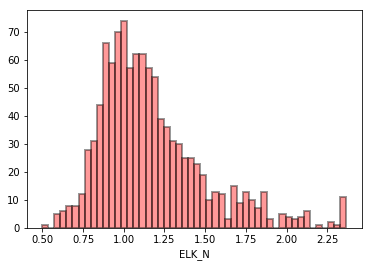

In [23]:
sns.distplot(df['ELK_N'], kde=False, color='red', bins=50,hist_kws = dict(lw=2,edgecolor='black'))

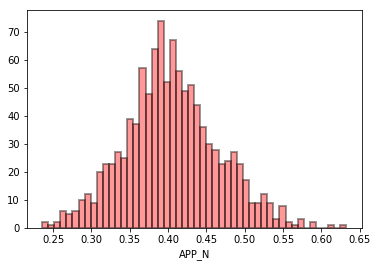

In [24]:
sns.distplot(df['APP_N'], kde=False, color='red', bins=50,hist_kws = dict(lw=2,edgecolor='black'))

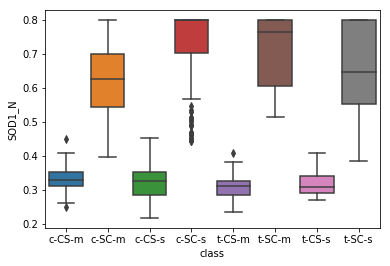

In [25]:
sns.boxplot(x="class", y="SOD1_N", data=df)

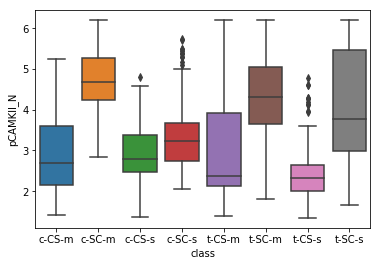

In [26]:
sns.boxplot(x="class", y="pCAMKII_N", data=df)

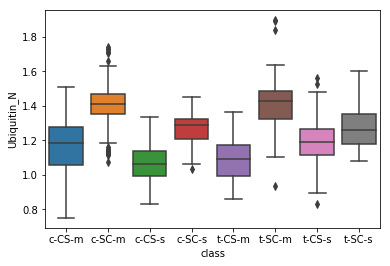

In [27]:
sns.boxplot(x="class", y="Ubiquitin_N", data=df)

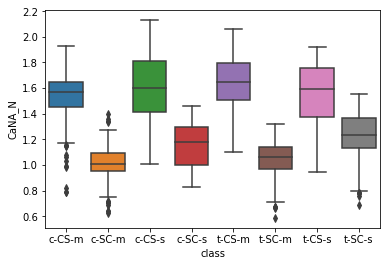

In [28]:
sns.boxplot(x="class", y="CaNA_N", data=df)

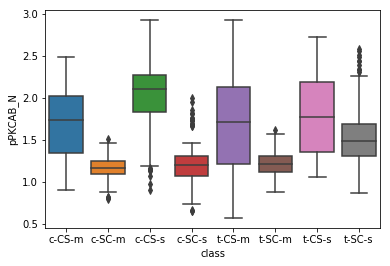

In [29]:
sns.boxplot(x="class", y="pPKCAB_N", data=df)

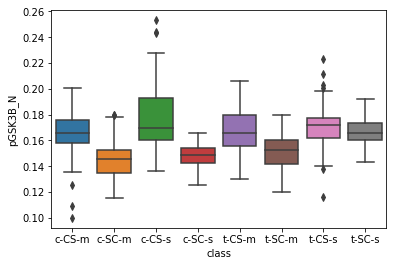

In [30]:
sns.boxplot(x="class", y="pGSK3B_N", data=df)

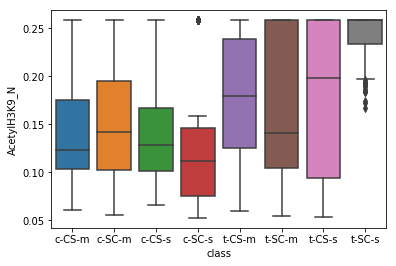

In [31]:
sns.boxplot(x="class", y="AcetylH3K9_N", data=df)

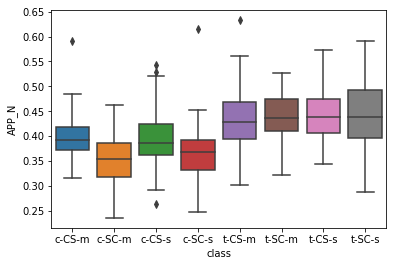

In [32]:
sns.boxplot(x="class", y="APP_N", data=df)

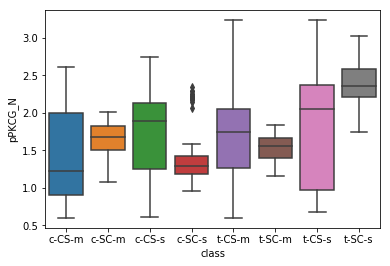

In [33]:
sns.boxplot(x="class", y="pPKCG_N", data=df)

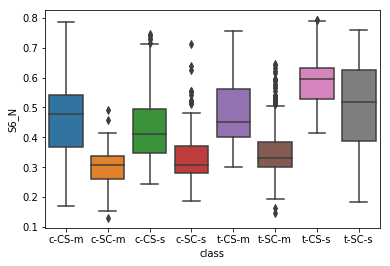

In [34]:
sns.boxplot(x="class", y="S6_N", data=df)

### Removing the unnecessary features and scaling 

Separating the target variable into a different dataframe.
Genotype,Treatment,Behaviour columns information is represted in the 'class' column and we see that they do not provide any special values independantly.
 Hence we remove the 3 columns before feeding it into models for analysis.

In [35]:
target = df['class']
data = df.drop(columns=['Genotype','Treatment','Behavior','class'])

columnNames = data.columns
data.shape

(1077, 77)

In [36]:
# Scaling the data
from sklearn import preprocessing

data = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(data))
data.columns = columnNames

data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.623187,0.534980,0.824638,0.612119,0.691296,0.344883,0.448666,0.212075,0.617322,0.512340,...,0.162941,0.177312,0.269676,0.426816,0.133930,0.336299,0.137602,0.102890,0.084580,0.705738
1,0.642272,0.473011,0.776455,0.601070,0.641697,0.328937,0.429899,0.195270,0.590173,0.452436,...,0.220010,0.146494,0.269676,0.429952,0.110434,0.365208,0.126584,0.115874,0.093977,0.749771
2,0.632821,0.516914,0.793572,0.558911,0.631459,0.323118,0.441381,0.193455,0.607102,0.438848,...,0.186816,0.155920,0.269676,0.448652,0.121560,0.353621,0.126229,0.109050,0.082162,0.868229
3,0.516161,0.396269,0.637326,0.468152,0.527007,0.353873,0.444307,0.166469,0.486945,0.451936,...,0.179047,0.229602,0.269676,0.392700,0.151031,0.265619,0.198858,0.164241,0.144543,0.721879
4,0.503697,0.396646,0.637787,0.426467,0.484608,0.332195,0.433100,0.162702,0.410194,0.416722,...,0.245702,0.215008,0.269676,0.410187,0.147711,0.350381,0.152103,0.136298,0.149281,0.812053


## Modelling

### KNN modelling

In [37]:
# KNN Model with default parameters
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.3, random_state=0)

knn_clf = KNeighborsClassifier()    #n=5,p=2
fit = knn_clf.fit(X_train,y_train)
pred = fit.predict(X_test)
accuracy_score(y_test,pred)

0.9753086419753086

In [38]:
knn_clf = KNeighborsClassifier(n_neighbors=3,p=2)    
fit = knn_clf.fit(X_train,y_train)
pred = fit.predict(X_test)
accuracy_score(y_test,pred)

0.9814814814814815

In [39]:
knn_clf = KNeighborsClassifier(n_neighbors=5,p=1)    
fit = knn_clf.fit(X_train,y_train)
pred = fit.predict(X_test)
accuracy_score(y_test,pred)

0.9660493827160493

In [40]:
knn_clf = KNeighborsClassifier(n_neighbors=3,p=1)    
fit = knn_clf.fit(X_train,y_train)
pred = fit.predict(X_test)
accuracy_score(y_test,pred)

0.9845679012345679

### Modelling using Decision Tree Classifier

In [41]:
# Now Applying Decision Tree models
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.3, random_state=0)

DT_clf = DecisionTreeClassifier()    #Criterion=Gini, Max Depth=none
fit = DT_clf.fit(X_train,y_train)
pred = fit.predict(X_test)
accuracy_score(y_test,pred)

0.808641975308642

In [42]:
DT_clf = DecisionTreeClassifier(criterion='entropy')    
fit = DT_clf.fit(X_train,y_train)
pred = fit.predict(X_test)
accuracy_score(y_test,pred)

0.7870370370370371

In [43]:
DT_clf = DecisionTreeClassifier(criterion='entropy',max_depth = 11)    
fit = DT_clf.fit(X_train,y_train)
pred = fit.predict(X_test)
accuracy_score(y_test,pred)

0.8055555555555556

In [44]:
DT_clf = DecisionTreeClassifier(criterion='gini',max_depth = 8)    
fit = DT_clf.fit(X_train,y_train)
pred = fit.predict(X_test)
accuracy_score(y_test,pred)

0.7993827160493827

## Feature Selection Using Hill Climb Technique

In [45]:
from sklearn.utils import shuffle

new_Ind = []
cur_MaxScore = 0.0
col_num = 77
col_Ind_Random = shuffle(range(0,col_num), random_state=1)

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = data.iloc[:, new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData,target, test_size=0.3, random_state=0)
    DT_clf =DecisionTreeClassifier(criterion='gini',max_depth = 8) 
    DT_fit = DT_clf.fit(X_train, y_train)
    cur_Score = DT_clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
print("Score with " + str(len(new_Ind)) + " selectedfeatures: " + str(cur_Score))

Score with 20 selectedfeatures: 0.8148148148148148


In [46]:
dtList = new_Ind[:len(new_Ind)]
selected_data2 = data.iloc[:,dtList]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(selected_data2,target, test_size=0.3, random_state=0)

DT_clf =DecisionTreeClassifier(criterion='gini',max_depth = 8)    
DT_fit = DT_clf.fit(X_train, y_train)
pred = DT_fit.predict(X_test)
print("Accuracy Score with selected features is",accuracy_score(y_test,pred))

Accuracy Score with selected features is 0.845679012345679


In [48]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,pred)
print("Classification Report \n",cr)

Classification Report 
              precision    recall  f1-score   support

     c-CS-m       0.80      0.86      0.83        37
     c-CS-s       0.75      0.79      0.77        42
     c-SC-m       0.89      0.91      0.90        43
     c-SC-s       0.93      0.91      0.92        47
     t-CS-m       0.77      0.75      0.76        44
     t-CS-s       0.77      0.69      0.73        29
     t-SC-m       0.85      0.93      0.89        43
     t-SC-s       1.00      0.87      0.93        39

avg / total       0.85      0.85      0.85       324



In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred)
print("Confusion Matrix \n",cm)

Confusion Matrix 
 [[32  0  0  0  5  0  0  0]
 [ 2 33  0  0  2  4  1  0]
 [ 0  0 39  2  0  0  2  0]
 [ 0  0  1 43  0  0  3  0]
 [ 4  6  0  0 33  1  0  0]
 [ 2  4  0  0  3 20  0  0]
 [ 0  0  2  1  0  0 40  0]
 [ 0  1  2  0  0  1  1 34]]


In [50]:
selected_data2.columns

Index(['Bcatenin_N', 'NUMB_N', 'GluR3_N', 'GluR4_N', 'P3525_N', 'pERK_N',
       'ARC_N', 'BDNF_N', 'pPKCG_N', 'pGSK3B_N', 'AKT_N', 'CaNA_N', 'pMTOR_N',
       'nNOS_N', 'P70S6_N', 'Tau_N', 'pPKCAB_N', 'H3AcK18_N', 'BAX_N',
       'BRAF_N'],
      dtype='object')